<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,75.176937,99.121511,8.730161,193.028609,186.517562,6.511047
1,0.0,1.0,31.111989,96.989453,0.192738,138.294180,140.109947,-1.815767
2,0.0,2.0,22.802377,21.233789,5.811790,59.847956,55.329732,4.518224
3,0.0,3.0,32.624012,37.817552,-3.037772,77.403791,81.926417,-4.522626
4,0.0,4.0,61.467226,49.385498,-1.896829,118.955895,122.566585,-3.610691
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.936985,99.738878,2.955362,174.631225,175.367170,-0.735944
19996,999.0,16.0,89.927322,81.252982,-12.223409,168.956896,181.598225,-12.641330
19997,999.0,17.0,99.371775,81.653344,-5.160300,185.864819,190.786061,-4.921242
19998,999.0,18.0,74.444054,35.703059,1.395702,121.542815,118.615374,2.927441


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    75.176937  99.121511   8.730161  193.028609  186.517562   
      1.0    31.111989  96.989453   0.192738  138.294180  140.109947   
      2.0    22.802377  21.233789   5.811790   59.847956   55.329732   
      3.0    32.624012  37.817552  -3.037772   77.403791   81.926417   
      4.0    61.467226  49.385498  -1.896829  118.955895  122.566585   
...                ...        ...        ...         ...         ...   
999.0 15.0   61.936985  99.738878   2.955362  174.631225  175.367170   
      16.0   89.927322  81.252982 -12.223409  168.956896  181.598225   
      17.0   99.371775  81.653344  -5.160300  185.864819  190.786061   
      18.0   74.444054  35.703059   1.395702  121.542815  118.615374   
      19.0   31.040543  50.061680   2.360062   93.462285   93.681838   

                 e_hat  
rep   index             
0.0   0.0     6.511047  
      1.0    -1.815767  
      2.0     4.518224  
      3.0    -4.522626  
      4.0    -3.610691  
...                ...  
999.0 15.0   -0.735944  
      16.0  -12.641330  
      17.0   -4.921242  
      18.0    2.927441  
      19.0   -0.219553  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    75.176937  99.121511   8.730161  193.028609  186.517562   
      1.0    31.111989  96.989453   0.192738  138.294180  140.109947   
      2.0    22.802377  21.233789   5.811790   59.847956   55.329732   
      3.0    32.624012  37.817552  -3.037772   77.403791   81.926417   
      4.0    61.467226  49.385498  -1.896829  118.955895  122.566585   
...                ...        ...        ...         ...         ...   
999.0 15.0   61.936985  99.738878   2.955362  174.631225  175.367170   
      16.0   89.927322  81.252982 -12.223409  168.956896  181.598225   
      17.0   99.371775  81.653344  -5.160300  185.864819  190.786061   
      18.0   74.444054  35.703059   1.395702  121.542815  118.615374   
      19.0   31.040543  50.061680   2.360062   93.462285   93.681838   

                 e_hat  
rep   index             
0.0   0.0     6.511047  
      1.0    -1.815767  
      2.0     4.518224  
      3.0    -4.522626  
      4.0    -3.610691  
...                ...  
999.0 15.0   -0.735944  
      16.0  -12.641330  
      17.0   -4.921242  
      18.0    2.927441  
      19.0   -0.219553  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,75.176937,99.121511,8.730161,193.028609,186.517562,6.511047
1,0.0,1.0,31.111989,96.989453,0.192738,138.294180,140.109947,-1.815767
2,0.0,2.0,22.802377,21.233789,5.811790,59.847956,55.329732,4.518224
3,0.0,3.0,32.624012,37.817552,-3.037772,77.403791,81.926417,-4.522626
4,0.0,4.0,61.467226,49.385498,-1.896829,118.955895,122.566585,-3.610691
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.936985,99.738878,2.955362,174.631225,175.367170,-0.735944
19996,999.0,16.0,89.927322,81.252982,-12.223409,168.956896,181.598225,-12.641330
19997,999.0,17.0,99.371775,81.653344,-5.160300,185.864819,190.786061,-4.921242
19998,999.0,18.0,74.444054,35.703059,1.395702,121.542815,118.615374,2.927441


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    75.176937  99.121511   8.730161  193.028609  186.517562   
      1.0    31.111989  96.989453   0.192738  138.294180  140.109947   
      2.0    22.802377  21.233789   5.811790   59.847956   55.329732   
      3.0    32.624012  37.817552  -3.037772   77.403791   81.926417   
      4.0    61.467226  49.385498  -1.896829  118.955895  122.566585   
...                ...        ...        ...         ...         ...   
999.0 15.0   61.936985  99.738878   2.955362  174.631225  175.367170   
      16.0   89.927322  81.252982 -12.223409  168.956896  181.598225   
      17.0   99.371775  81.653344  -5.160300  185.864819  190.786061   
      18.0   74.444054  35.703059   1.395702  121.542815  118.615374   
      19.0   31.040543  50.061680   2.360062   93.462285   93.681838   

                 e_hat  
rep   index             
0.0   0.0     6.511047  
      1.0    -1.815767  
      2.0     4.518224  
      3.0    -4.522626  
      4.0    -3.610691  
...                ...  
999.0 15.0   -0.735944  
      16.0  -12.641330  
      17.0   -4.921242  
      18.0    2.927441  
      19.0   -0.219553  

[20000 rows x 6 columns]

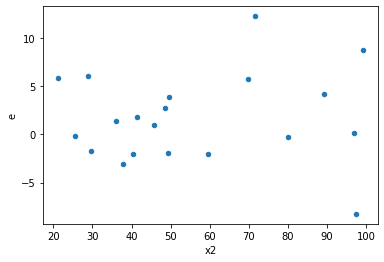

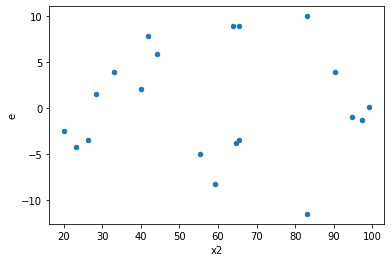

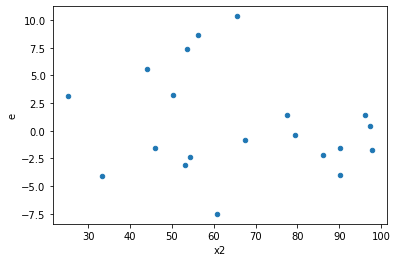

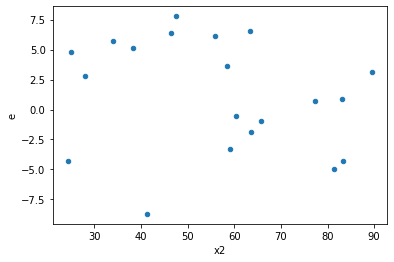

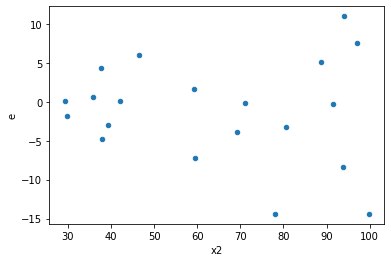

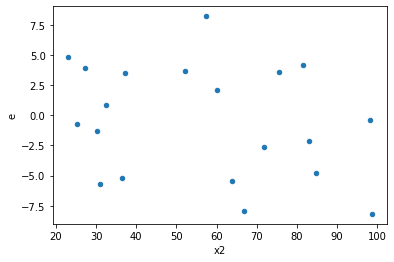

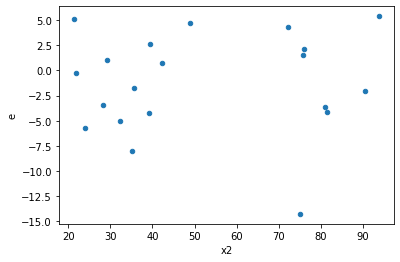

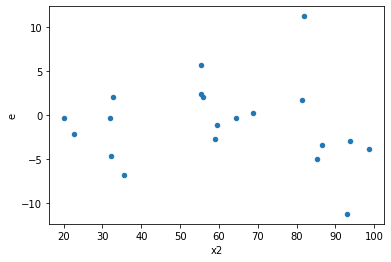

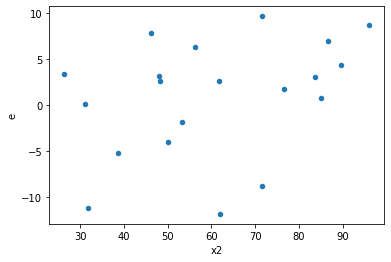

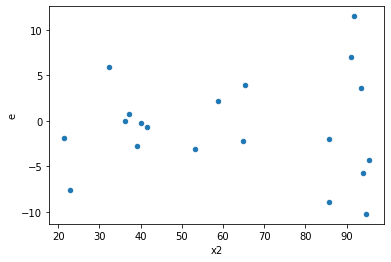

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,10.0,6.0,146.41399003894853,154.7654617765676,14.641399003894852,25.794243629427935,1.7617335353381356,0.504093770259628,0.747953114870186,0.252046885129814,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,291.1546281207315,506.96048959149385,36.39432851509144,63.37006119893673,1.7412070447366383,0.44989369995124995,0.775053150024375,0.22494684997562497,Reject001=1 : Homoscedasticity
5.0,4.0,12.0,76.79729672574148,210.24974972790116,19.19932418143537,17.520812477325098,0.9125744381287496,0.9751990887332755,0.5124004556333622,0.48759954436663777,Reject001=1 : Homoscedasticity
12.0,9.0,7.0,201.05525269438164,239.6330449354419,22.33947252159796,34.233292133634556,1.5324127326881853,0.5869840441329366,0.7065079779335317,0.2934920220664683,Reject001=1 : Homoscedasticity
14.0,8.0,8.0,211.7061791676565,549.3981946067754,26.463272395957063,68.67477432584693,2.59509758650781,0.19898882506264037,0.9005055874686798,0.09949441253132019,Reject001=1 : Homoscedasticity
15.0,13.0,3.0,270.00790832840187,104.69063569126124,20.769839102184758,34.896878563753745,1.680170866614127,0.7415390437898912,0.6292304781050544,0.3707695218949456,Reject001=1 : Homoscedasticity
17.0,10.0,6.0,176.3365234312647,177.59382231862372,17.63365234312647,29.598970386437287,1.6785501840731736,0.5434510251259517,0.7282744874370242,0.27172551256297583,Reject001=1 : Homoscedasticity
18.0,5.0,11.0,20.00452384059489,341.3479471955419,4.0009047681189776,31.031631563231084,7.756153510702176,0.004783988398451289,0.9976080058007744,0.0023919941992256444,Reject001=0 : Heteroscedasticity
21.0,11.0,5.0,313.0819214028235,184.6734019654115,28.461992854802137,36.9346803930823,1.2976842690356676,0.819663359106706,0.590168320446647,0.409831679553353,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,326.4088935923348,46.10554246019869,32.640889359233476,7.684257076699782,0.2354181282295868,0.043813870490663695,Reject001=1 : Homoscedasticity
1.0,6.0,10.0,262.90517706844076,321.06839382630494,43.817529511406796,32.1068393826305,0.7327396076557051,0.7303508772967028,Reject001=1 : Homoscedasticity
2.0,10.0,6.0,224.73910815189274,80.21128295188853,22.473910815189274,13.36854715864809,0.5948473885378591,0.4460805883103703,Reject001=1 : Homoscedasticity
3.0,10.0,6.0,146.41399003894853,154.7654617765676,14.641399003894852,25.794243629427935,1.7617335353381356,0.504093770259628,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,291.1546281207315,506.96048959149385,36.39432851509144,63.37006119893673,1.7412070447366383,0.44989369995124995,Reject001=1 : Homoscedasticity
5.0,4.0,12.0,76.79729672574148,210.24974972790116,19.19932418143537,17.520812477325098,0.9125744381287496,0.9751990887332755,Reject001=1 : Homoscedasticity
6.0,10.0,6.0,321.52043293881246,46.84500634423971,32.15204329388125,7.807501057373284,0.2428306339976565,0.04828601686147513,Reject001=1 : Homoscedasticity
7.0,7.0,9.0,247.37321563408463,78.51890977338907,35.33903080486923,8.724323308154341,0.2468750022129144,0.07860193085156009,Reject001=1 : Homoscedasticity
8.0,12.0,4.0,285.8701377664302,106.96135807271784,23.82251148053585,26.74033951817946,1.1224819658509817,0.9974997566643595,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      915
Reject001=0 : Heteroscedasticity     85
Name: Result_test, dtype: int64